In [10]:
import rasterio
from matplotlib import pyplot as plt
from rasterio.windows import Window
import numpy as np
from tqdm import tqdm


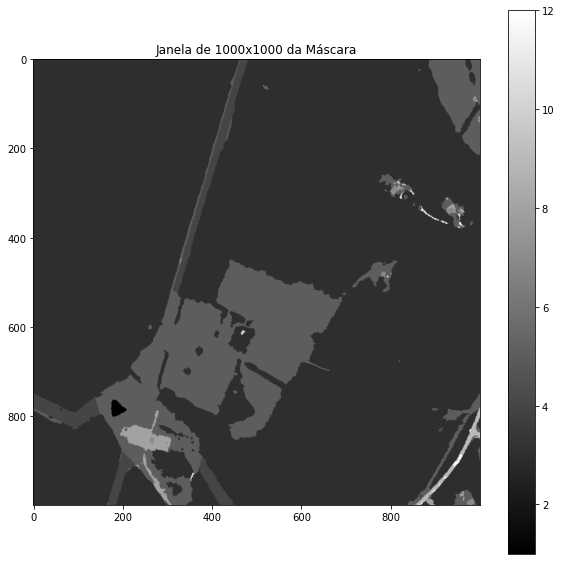

In [4]:
# Caminho do arquivo .tif
tif_path = '/scratch/matheuspimenta/va_lc_2018_2022-Edition.tif'
# Defina o tamanho da janela (1000x1000 pixels)
window_size = 1000

# Abrindo o arquivo .tif com rasterio
with rasterio.open(tif_path) as src:
    # Dimensões da imagem original
    width, height = src.width, src.height
    
    # Escolha uma posição inicial (aqui pegamos o centro da imagem)
    x_center, y_center = width // 2, height // 2
    
    # Defina as coordenadas da janela
    window = Window(
        x_center - window_size // 2,
        y_center - window_size // 2,
        window_size,
        window_size
    )
    
    # Leia a janela da primeira banda
    mask_window = src.read(1, window=window)

    # Plotando a máscara
    plt.figure(figsize=(10, 10))
    plt.imshow(mask_window, cmap='gray')
    plt.colorbar()
    plt.title(f"Janela de 1000x1000 da Máscara")
    plt.show()

In [15]:
window_size = 2000

# Set para armazenar os valores únicos
unique_values = set()

# Abrindo o arquivo .tif com rasterio
with rasterio.open(tif_path) as src:
    width, height = src.width, src.height
    
    # Calcula o número total de janelas
    num_windows_x = (width + window_size - 1) // window_size
    num_windows_y = (height + window_size - 1) // window_size
    total_windows = num_windows_x * num_windows_y
    
    # Loop sobre a imagem, criando janelas de tamanho 1000x1000
    with tqdm(total=total_windows, desc="Processando Janelas") as pbar:
        for y in range(0, height, window_size):
            for x in range(0, width, window_size):
                # Certificando-se de que a janela não exceda os limites da imagem
                w = min(window_size, width - x)
                h = min(window_size, height - y)
                
                # Criando a janela
                window = Window(x, y, w, h)
                
                # Lendo os dados da janela
                data = src.read(1, window=window)
                
                # Obtendo valores únicos na janela e adicionando ao set
                unique_values.update(np.unique(data))
                
                # Atualizando a barra de progresso
                pbar.update(1)

# Exibindo os valores únicos encontrados
print(f"Valores únicos na imagem: {sorted(unique_values)}")

Processando Janelas: 100%|██████████| 37820/37820 [15:00<00:00, 41.99it/s]

Valores únicos na imagem: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 255]


In [ ]:
12 - ny_1m_2013_extended-debuffered-train_tiles/m_4207746_nw_18_1_lc.tif;1200,1600
10 - 

In [ ]:
https://www.kaggle.com/code/davidom/landcover-segmentation-via-cnn